In [1]:
## IMPORT NECESSARY LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pylab
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

In [2]:
##LOAD DATA FOR EXPLOTARY DATA ANALYSIS
data = pd.read_excel('INX_Future_Inc_Employee_Performance_Data.xls')
pd.set_option('display.max_columns',None) # Used to display the all features

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [4]:
## CHECK MISSING VALUE:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

Technique Used:

1.Manual Encoding: Manual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

2.Frequency Encoding: Frequency encoding is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts.

In [5]:
## 1.Gender:
# Get value counts of gender
data.Gender.value_counts()
# Use manual encoding to map the labels
data.Gender = data.Gender.map({'Male':1,'Female':0})

In [6]:
fq = data.groupby('EducationBackground').size()/len(data)
# mapping values to dataframe
data.loc[:, "{}_freq_encode".format('EducationBackground')] = data['EducationBackground'].map(fq)

In [7]:
# Checking conversion happen or not
data.head(10)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,EducationBackground_freq_encode
0,E1001000,32,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3,0.114167
1,E1001006,47,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3,0.114167
2,E1001007,40,1,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4,0.410000
3,E1001009,41,1,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3,0.017500
4,E1001010,60,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3,0.114167
5,E1001011,27,1,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,4,32,3,3,1,1,No,21,3,9,4,2,9,7,1,7,No,4,0.410000
6,E1001016,50,1,Marketing,Married,Sales,Sales Representative,Travel_Rarely,8,4,4,54,3,1,2,7,No,15,4,4,2,3,2,2,2,2,No,3,0.114167
7,E1001019,28,0,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,1,67,1,1,2,7,Yes,13,4,10,4,3,7,7,3,7,Yes,3,0.410000
8,E1001020,36,0,Life Sciences,Married,Development,Developer,Non-Travel,8,3,1,63,4,3,1,9,No,14,1,10,2,3,8,7,0,5,No,3,0.410000
9,E1001021,38,0,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,3,81,3,3,3,4,Yes,14,4,10,4,4,1,0,0,0,No,3,0.410000


In [8]:
## 3.Marital Status
# Get the value counts of marital status
data.MaritalStatus.value_counts()
# Use mannual encoding
data.MaritalStatus = data.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [9]:
# Check conversion happen or not
data.MaritalStatus.value_counts()

2    548
1    384
0    268
Name: MaritalStatus, dtype: int64

In [10]:
fq = data.groupby('EmpDepartment').size()/len(data)
# mapping values to dataframe
data.loc[:, "{}_freq_encode".format('EmpDepartment')] = data['EmpDepartment'].map(fq)

In [11]:
fq = data.groupby('EmpJobRole').size()/len(data)
# mapping values to dataframe
data.loc[:, "{}_freq_encode".format('EmpJobRole')] = data['EmpJobRole'].map(fq)

In [12]:
fq = data.groupby('BusinessTravelFrequency').size()/len(data)
# mapping values to dataframe
data.loc[:, "{}_freq_encode".format('BusinessTravelFrequency')] = data['BusinessTravelFrequency'].map(fq)

In [13]:
## 7.Overtime:
# Get the value count of Overtime
data.OverTime.value_counts()
# Use mannual Encoding
data.OverTime = data.OverTime.map({'No':1,'Yes':0})

In [14]:
# Check conversion happen or not
data.head(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,EducationBackground_freq_encode,EmpDepartment_freq_encode,EmpJobRole_freq_encode,BusinessTravelFrequency_freq_encode
0,E1001000,32,1,Marketing,1,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,1,12,4,10,2,2,10,7,0,8,No,3,0.114167,0.310833,0.2250,0.705
1,E1001006,47,1,Marketing,1,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,1,12,4,20,2,3,7,7,1,7,No,3,0.114167,0.310833,0.2250,0.705
2,E1001007,40,1,Life Sciences,2,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,0,21,3,20,2,3,18,13,1,12,No,4,0.410000,0.310833,0.2250,0.185
3,E1001009,41,1,Human Resources,0,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,1,15,2,23,2,2,21,6,12,6,No,3,0.017500,0.045000,0.0425,0.705
4,E1001010,60,1,Marketing,1,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,1,14,4,10,1,3,2,2,2,2,No,3,0.114167,0.310833,0.2250,0.705


In [15]:
## 8.Attrition
# Get the value counts of Attrition
data.Attrition.value_counts()
# Use Mannual encoding because feature contain less no of label
data.Attrition = data.Attrition.map({'No':1,'Yes':0})

In [16]:
# Check conversion happen or not
data.head(10)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,EducationBackground_freq_encode,EmpDepartment_freq_encode,EmpJobRole_freq_encode,BusinessTravelFrequency_freq_encode
0,E1001000,32,1,Marketing,1,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,1,12,4,10,2,2,10,7,0,8,1,3,0.114167,0.310833,0.225000,0.705
1,E1001006,47,1,Marketing,1,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,1,12,4,20,2,3,7,7,1,7,1,3,0.114167,0.310833,0.225000,0.705
2,E1001007,40,1,Life Sciences,2,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,0,21,3,20,2,3,18,13,1,12,1,4,0.410000,0.310833,0.225000,0.185
3,E1001009,41,1,Human Resources,0,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,1,15,2,23,2,2,21,6,12,6,1,3,0.017500,0.045000,0.042500,0.705
4,E1001010,60,1,Marketing,1,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,1,14,4,10,1,3,2,2,2,2,1,3,0.114167,0.310833,0.225000,0.705
5,E1001011,27,1,Life Sciences,0,Development,Developer,Travel_Frequently,10,2,4,32,3,3,1,1,1,21,3,9,4,2,9,7,1,7,1,4,0.410000,0.300833,0.196667,0.185
6,E1001016,50,1,Marketing,2,Sales,Sales Representative,Travel_Rarely,8,4,4,54,3,1,2,7,1,15,4,4,2,3,2,2,2,2,1,3,0.114167,0.310833,0.057500,0.705
7,E1001019,28,0,Life Sciences,1,Development,Developer,Travel_Rarely,1,2,1,67,1,1,2,7,0,13,4,10,4,3,7,7,3,7,0,3,0.410000,0.300833,0.196667,0.705
8,E1001020,36,0,Life Sciences,2,Development,Developer,Non-Travel,8,3,1,63,4,3,1,9,1,14,1,10,2,3,8,7,0,5,1,3,0.410000,0.300833,0.196667,0.110
9,E1001021,38,0,Life Sciences,1,Development,Developer,Travel_Rarely,1,3,3,81,3,3,3,4,0,14,4,10,4,4,1,0,0,0,1,3,0.410000,0.300833,0.196667,0.705


In [17]:
data.drop(['EducationBackground','EmpDepartment','EmpJobRole','BusinessTravelFrequency'],axis=1,inplace=True)

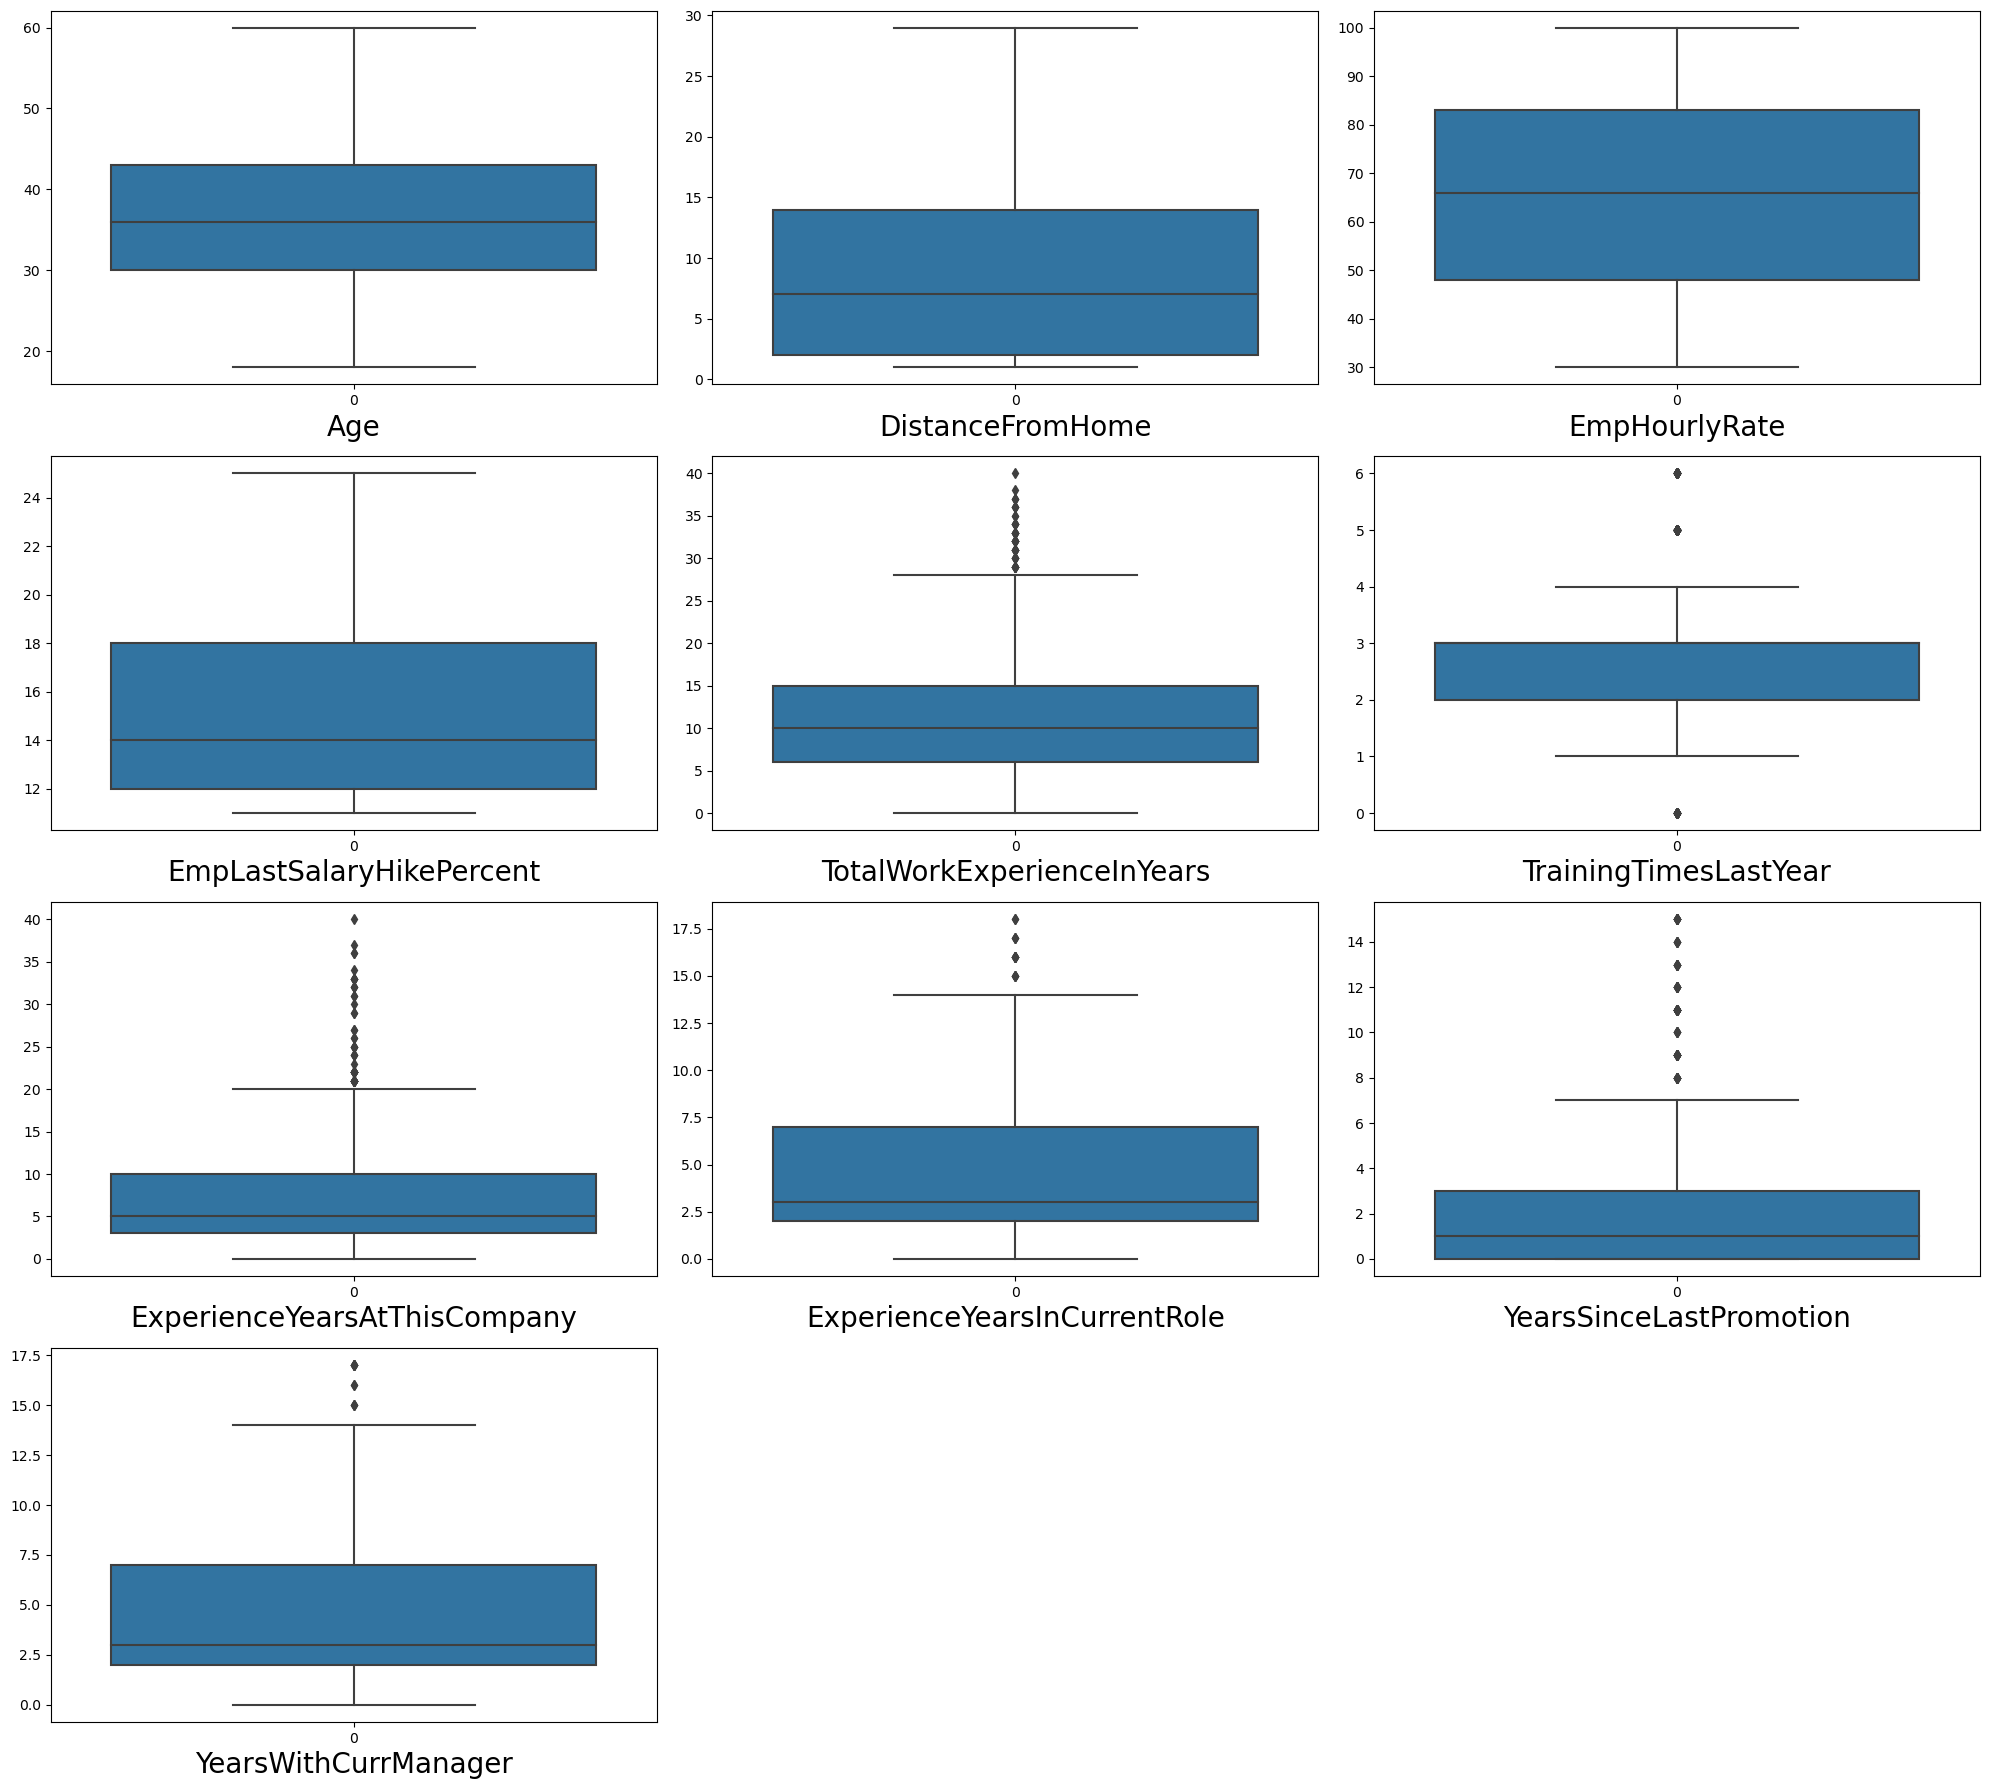

In [18]:
## CHECK OUTLIERS AND IMPUTE OUTLIERS:
## BoxPlot: Box plots are used to show distributions of numeric data values as well as it helps to detect the outliers.

out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

Here we are use capping and flooring method to impute the outlier, Since the outliers have no dependency over target variable.

Capping is replacing all higher side values exceeding a certain theoretical maximum or upper control limit (UCL) by the UCL value. 
* Statistical formula for UCL is UCL = Q3 + 1.5 * IQR

Flooring is replacing all values falling below a certain theoretical minimum or lower control limit (UCL) by the LCL value.
* Statistical formula for LCL is LCL = Q1 – 1.5 * IQR

In [19]:
## 1. Total Work Experience In Years
#Getting Upper Control Limit value for TotalWorkExperienceInYears
Q1, Q3 = data['TotalWorkExperienceInYears'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", UCL)

UCL =  28.5


In [20]:
# If value above 28 then replace by 28
data['TotalWorkExperienceInYears_cap'] = data['TotalWorkExperienceInYears'].map(
    lambda x: 28 if x > 28 else x
)

In [21]:
## 2.Training Times Last Year
#Getting Upper Control Limit value and Lower Control Limit value for Training timr last year
Q1, Q3 = data['TrainingTimesLastYear'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
LCL = Q1 - 1.5 * (Q3 - Q1)
print("UCL = ", UCL)
print("LCL = ", LCL)

UCL =  4.5
LCL =  0.5


In [22]:
data['TrainingTimesLastYear_cap_floor'] = data['TrainingTimesLastYear'].map(
    lambda x: 4.5 if x > 4.5 else (0.5 if x < 0.5 else x)
)

In [23]:
## 3.Experience Years At This Company
#Getting Upper Control Limit value for TotalWorkExperienceInYears
Q1, Q3 = data['ExperienceYearsAtThisCompany'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", UCL)
# If value above 20.5 then replace by 20.5
data['ExperienceYearsAtThisCompany_cap'] = data['ExperienceYearsAtThisCompany'].map(
    lambda x: 20.5 if x > 20.5 else x
)

UCL =  20.5


In [24]:
## 4.Experience Years In Current Role
#Getting Upper Control Limit value for 'ExperienceYearsInCurrentRole'
Q1, Q3 = data['ExperienceYearsInCurrentRole'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", UCL)
# If value above 14.5 then replace by 14.5
data['ExperienceYearsInCurrentRole_cap'] = data['ExperienceYearsInCurrentRole'].map(
    lambda x: 14.5 if x > 14.5 else x
)

UCL =  14.5


In [25]:
## 5.Years Since Last Promotion
#Getting Upper Control Limit value for 'YearsSinceLastPromotion'
Q1, Q3 = data['YearsSinceLastPromotion'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", UCL)
# If value above 14.5 then replace by 14.5
data['YearsSinceLastPromotion_cap'] = data['YearsSinceLastPromotion'].map(
    lambda x: UCL if x > UCL else x
)

UCL =  7.5


In [26]:
## 6.Years With Current Manager
#Getting Upper Control Limit value for 'YearsWithCurrManager'
Q1, Q3 = data['YearsWithCurrManager'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", UCL)
# If value above 14.5 then replace by 14.5
data['YearsWithCurrManager_cap'] = data['YearsWithCurrManager'].map(
    lambda x: UCL if x > UCL else x
)

UCL =  14.5


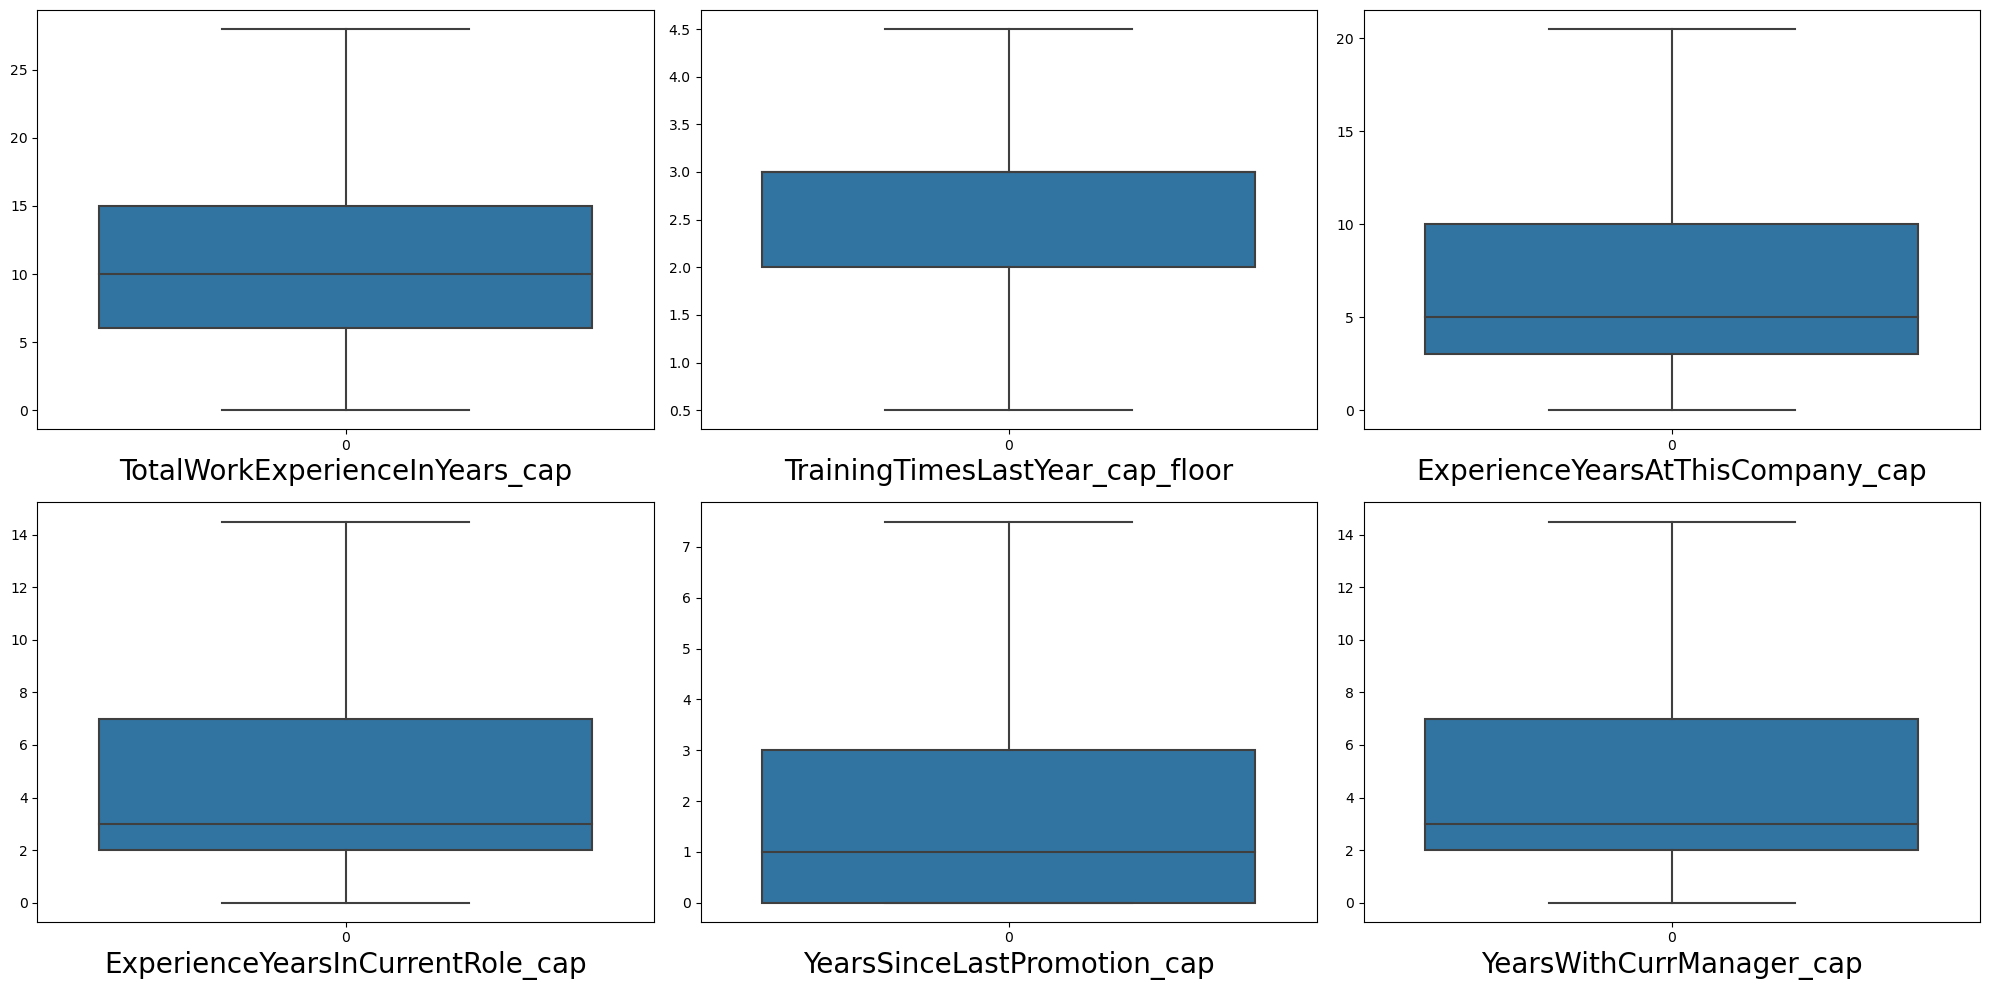

In [27]:
# CHECKING OUTLIER AFTER IMPUTATION
out = data[['TotalWorkExperienceInYears_cap','TrainingTimesLastYear_cap_floor','ExperienceYearsAtThisCompany_cap',
            'ExperienceYearsInCurrentRole_cap','YearsSinceLastPromotion_cap','YearsWithCurrManager_cap']]

plt.figure(figsize=(20,10)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(2,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

In [28]:
data.drop(['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'],axis=1,inplace=True)

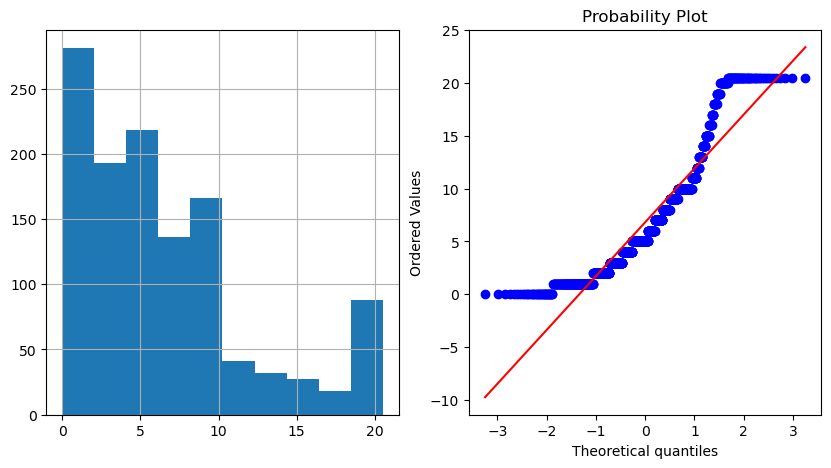

In [29]:
# define a function to plot a Q-Q plot
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(data,'ExperienceYearsAtThisCompany_cap')

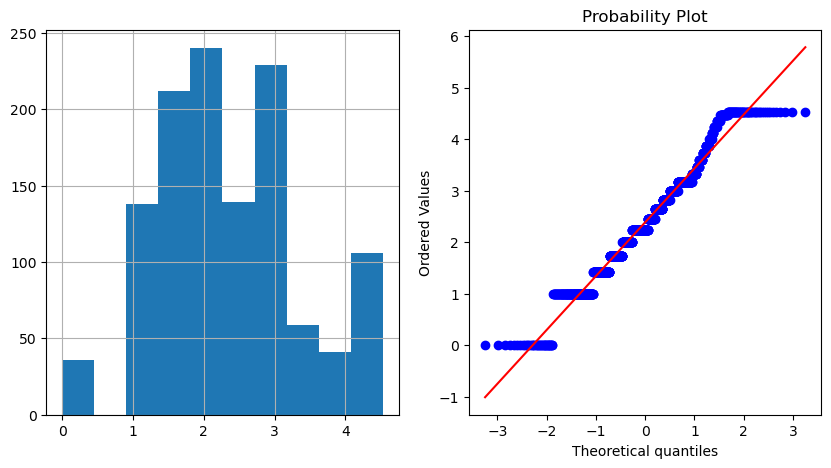

In [30]:
## SQUARE ROOT TRANSFORMATION
data['square_ExperienceYearsAtThisCompany_cap'] = data.ExperienceYearsAtThisCompany_cap**(1/2)
plot_data(data,'square_ExperienceYearsAtThisCompany_cap')

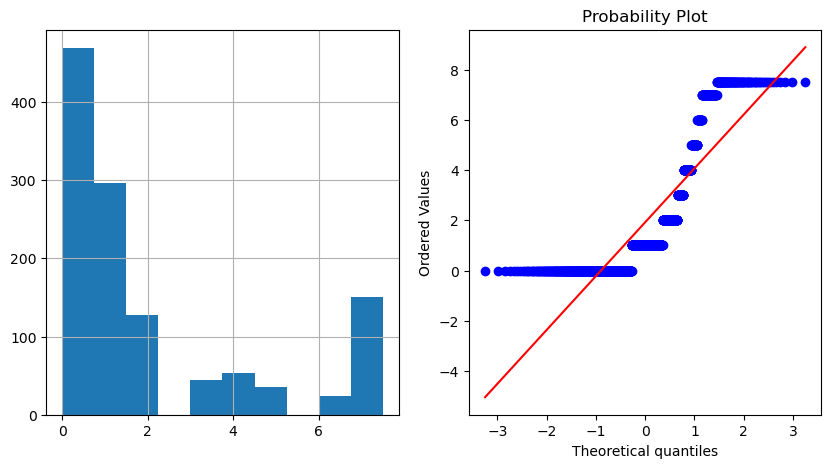

In [31]:
plot_data(data,'YearsSinceLastPromotion_cap')

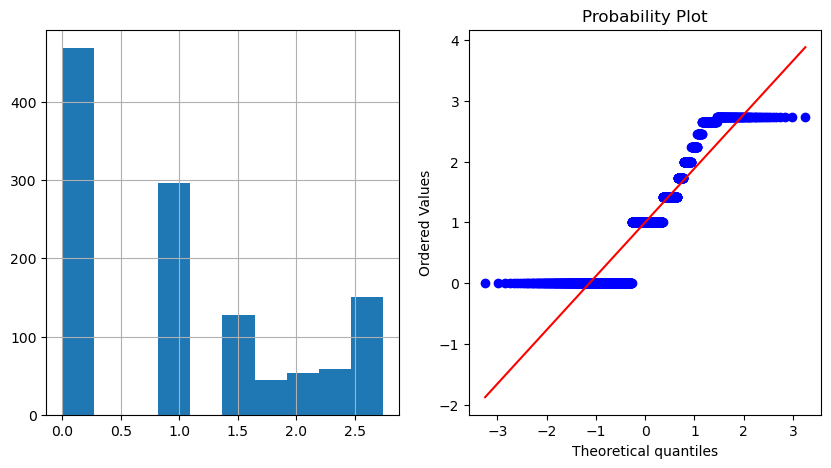

In [32]:
data['square_YearsSinceLastPromotion_cap'] = data.YearsSinceLastPromotion_cap**(1/2)
plot_data(data,'square_YearsSinceLastPromotion_cap')

In [33]:
data.head(10)

,EmpNumber,Age,Gender,MaritalStatus,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Attrition,PerformanceRating,EducationBackground_freq_encode,EmpDepartment_freq_encode,EmpJobRole_freq_encode,BusinessTravelFrequency_freq_encode,TotalWorkExperienceInYears_cap,TrainingTimesLastYear_cap_floor,ExperienceYearsAtThisCompany_cap,ExperienceYearsInCurrentRole_cap,YearsSinceLastPromotion_cap,YearsWithCurrManager_cap,square_ExperienceYearsAtThisCompany_cap,square_YearsSinceLastPromotion_cap
0,E1001000,32,1,1,10,3,4,55,3,2,4,1,1,12,4,2,1,3,0.114167,0.310833,0.225000,0.705,10,2.0,10.0,7.0,0.0,8.0,3.162278,0.000000
1,E1001006,47,1,1,14,4,4,42,3,2,1,2,1,12,4,3,1,3,0.114167,0.310833,0.225000,0.705,20,2.0,7.0,7.0,1.0,7.0,2.645751,1.000000
2,E1001007,40,1,2,5,4,4,48,2,3,1,5,0,21,3,3,1,4,0.410000,0.310833,0.225000,0.185,20,2.0,18.0,13.0,1.0,12.0,4.242641,1.000000
3,E1001009,41,1,0,10,4,2,73,2,5,4,3,1,15,2,2,1,3,0.017500,0.045000,0.042500,0.705,23,2.0,20.5,6.0,7.5,6.0,4.527693,2.738613
4,E1001010,60,1,1,16,4,1,84,3,2,1,8,1,14,4,3,1,3,0.114167,0.310833,0.225000,0.705,10,1.0,2.0,2.0,2.0,2.0,1.414214,1.414214
5,E1001011,27,1,0,10,2,4,32,3,3,1,1,1,21,3,2,1,4,0.410000,0.300833,0.196667,0.185,9,4.0,9.0,7.0,1.0,7.0,3.000000,1.000000
6,E1001016,50,1,2,8,4,4,54,3,1,2,7,1,15,4,3,1,3,0.114167,0.310833,0.057500,0.705,4,2.0,2.0,2.0,2.0,2.0,1.414214,1.414214
7,E1001019,28,0,1,1,2,1,67,1,1,2,7,0,13,4,3,0,3,0.410000,0.300833,0.196667,0.705,10,4.0,7.0,7.0,3.0,7.0,2.645751,1.732051
8,E1001020,36,0,2,8,3,1,63,4,3,1,9,1,14,1,3,1,3,0.410000,0.300833,0.196667,0.110,10,2.0,8.0,7.0,0.0,5.0,2.828427,0.000000
9,E1001021,38,0,1,1,3,3,81,3,3,3,4,0,14,4,4,1,3,0.410000,0.300833,0.196667,0.705,10,4.0,1.0,0.0,0.0,0.0,1.000000,0.000000


In [34]:
data.drop(['EmpNumber','ExperienceYearsAtThisCompany_cap', 'YearsSinceLastPromotion_cap'],axis=1,inplace=True)

In [35]:
data.columns

Index(['Age', 'Gender', 'MaritalStatus', 'DistanceFromHome',
       'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
       'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction',
       'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance', 'Attrition',
       'PerformanceRating', 'EducationBackground_freq_encode',
       'EmpDepartment_freq_encode', 'EmpJobRole_freq_encode',
       'BusinessTravelFrequency_freq_encode', 'TotalWorkExperienceInYears_cap',
       'TrainingTimesLastYear_cap_floor', 'ExperienceYearsInCurrentRole_cap',
       'YearsWithCurrManager_cap', 'square_ExperienceYearsAtThisCompany_cap',
       'square_YearsSinceLastPromotion_cap'],
      dtype='object')

In [36]:
data.describe()

,Age,Gender,MaritalStatus,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Attrition,PerformanceRating,EducationBackground_freq_encode,EmpDepartment_freq_encode,EmpJobRole_freq_encode,BusinessTravelFrequency_freq_encode,TotalWorkExperienceInYears_cap,TrainingTimesLastYear_cap_floor,ExperienceYearsInCurrentRole_cap,YearsWithCurrManager_cap,square_ExperienceYearsAtThisCompany_cap,square_YearsSinceLastPromotion_cap
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000
mean,36.918333,0.604167,1.233333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,0.705833,15.222500,2.725000,2.744167,0.851667,2.948333,0.293810,0.272789,0.115976,0.543350,11.137500,2.705833,4.269167,4.08875,2.388673,1.002193
std,9.087289,0.489233,0.791250,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,0.455857,3.625918,1.075642,0.699374,0.355578,0.518866,0.132733,0.079785,0.083700,0.250776,7.290831,1.026000,3.542434,3.48837,1.057594,0.960318
min,18.000000,0.000000,0.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,11.000000,1.000000,1.000000,0.000000,2.000000,0.017500,0.016667,0.005833,0.110000,0.000000,0.500000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,0.000000,12.000000,2.000000,2.000000,1.000000,3.000000,0.114167,0.285833,0.042500,0.185000,6.000000,2.000000,2.000000,2.00000,1.732051,0.000000
50%,36.000000,1.000000,1.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,1.000000,14.000000,3.000000,3.000000,1.000000,3.000000,0.320000,0.300833,0.071250,0.705000,10.000000,3.000000,3.000000,3.00000,2.236068,1.000000
75%,43.000000,1.000000,2.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,1.000000,18.000000,4.000000,3.000000,1.000000,3.000000,0.410000,0.310833,0.196667,0.705000,15.000000,3.000000,7.000000,7.00000,3.162278,1.732051
max,60.000000,1.000000,2.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,1.000000,25.000000,4.000000,4.000000,1.000000,4.000000,0.410000,0.310833,0.225000,0.705000,28.000000,4.500000,14.500000,14.50000,4.527693,2.738613


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Create an instance of the StandardScaler

columns_to_scale = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent',
                    'TotalWorkExperienceInYears_cap', 'TrainingTimesLastYear_cap_floor',
                    'ExperienceYearsInCurrentRole_cap', 'YearsWithCurrManager_cap',
                    'square_ExperienceYearsAtThisCompany_cap', 'square_YearsSinceLastPromotion_cap']

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


In [38]:
data.head(10)

,Age,Gender,MaritalStatus,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Attrition,PerformanceRating,EducationBackground_freq_encode,EmpDepartment_freq_encode,EmpJobRole_freq_encode,BusinessTravelFrequency_freq_encode,TotalWorkExperienceInYears_cap,TrainingTimesLastYear_cap_floor,ExperienceYearsInCurrentRole_cap,YearsWithCurrManager_cap,square_ExperienceYearsAtThisCompany_cap,square_YearsSinceLastPromotion_cap
0,-0.541458,1,1,0.102061,3,4,-0.543569,3,2,4,1,1,-0.889111,4,2,1,3,0.114167,0.310833,0.225000,0.705,-0.156083,-0.688233,0.771213,1.121693,0.731781,-1.044041
1,1.109888,1,1,0.591464,4,4,-1.187042,3,2,1,2,1,-0.889111,4,3,1,3,0.114167,0.310833,0.225000,0.705,1.216075,-0.688233,0.771213,0.834907,0.243180,-0.002285
2,0.339260,1,2,-0.509693,4,4,-0.890055,2,3,1,5,0,1.594054,3,3,1,4,0.410000,0.310833,0.225000,0.185,1.216075,-0.688233,2.465670,2.268839,1.753735,-0.002285
3,0.449349,1,0,0.102061,4,2,0.347393,2,5,4,3,1,-0.061389,2,2,1,3,0.017500,0.045000,0.042500,0.705,1.627722,-0.688233,0.488804,0.548120,2.023376,1.808926
4,2.541054,1,1,0.836165,4,1,0.891870,3,2,1,8,1,-0.337297,4,3,1,3,0.114167,0.310833,0.225000,0.705,-0.156083,-1.663298,-0.640834,-0.599025,-0.921777,0.429225
5,-1.091906,1,0,0.102061,2,4,-1.682021,3,3,1,1,1,1.594054,3,2,1,4,0.410000,0.300833,0.196667,0.185,-0.293299,1.261897,0.771213,0.834907,0.578276,-0.002285
6,1.440157,1,2,-0.142640,4,4,-0.593067,3,1,2,7,1,-0.061389,4,3,1,3,0.114167,0.310833,0.057500,0.705,-0.979377,-0.688233,-0.640834,-0.599025,-0.921777,0.429225
7,-0.981817,0,1,-0.999095,2,1,0.050405,1,1,2,7,0,-0.613204,4,3,0,3,0.410000,0.300833,0.196667,0.705,-0.156083,1.261897,0.771213,0.834907,0.243180,0.760333
8,-0.101099,0,2,-0.142640,3,1,-0.147586,4,3,1,9,1,-0.337297,1,3,1,3,0.410000,0.300833,0.196667,0.110,-0.156083,-0.688233,0.771213,0.261334,0.415979,-1.044041
9,0.119080,0,1,-0.999095,3,3,0.743376,3,3,3,4,0,-0.337297,4,4,1,3,0.410000,0.300833,0.196667,0.705,-0.156083,1.261897,-1.205653,-1.172598,-1.313596,-1.044041


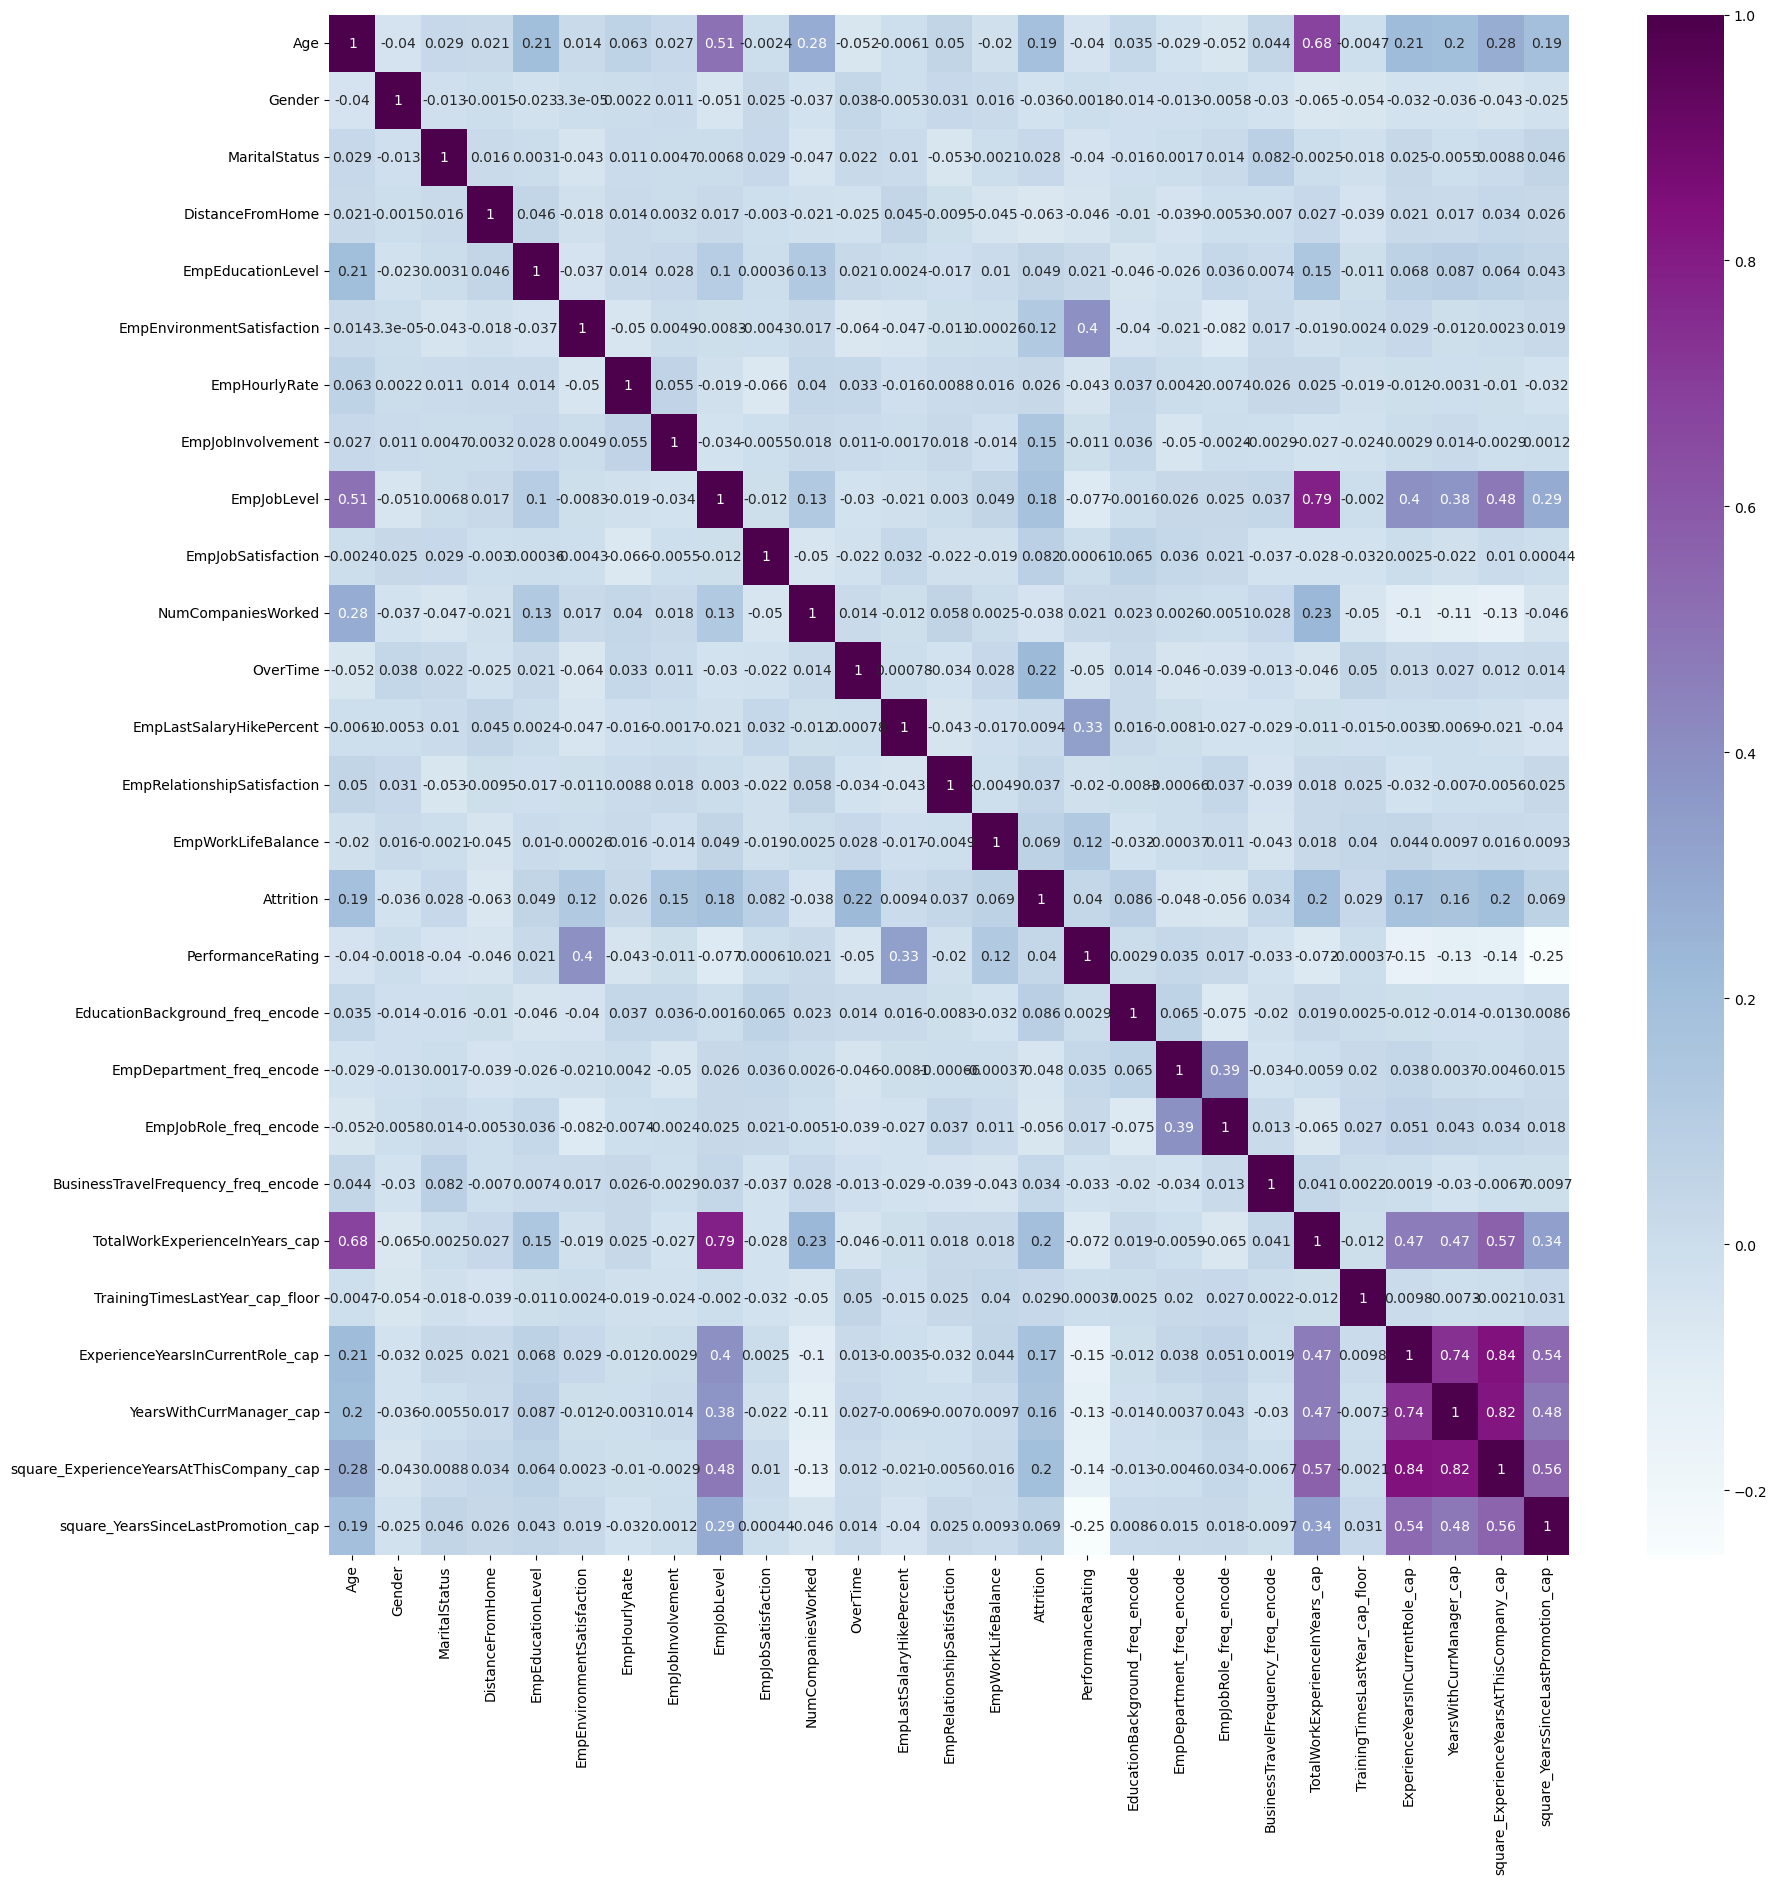

In [39]:
## CHECKING CORELATION
# Heatmap: A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

In [40]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


In [41]:
## CHECKING DUPLICATES
data.duplicated().sum()

0

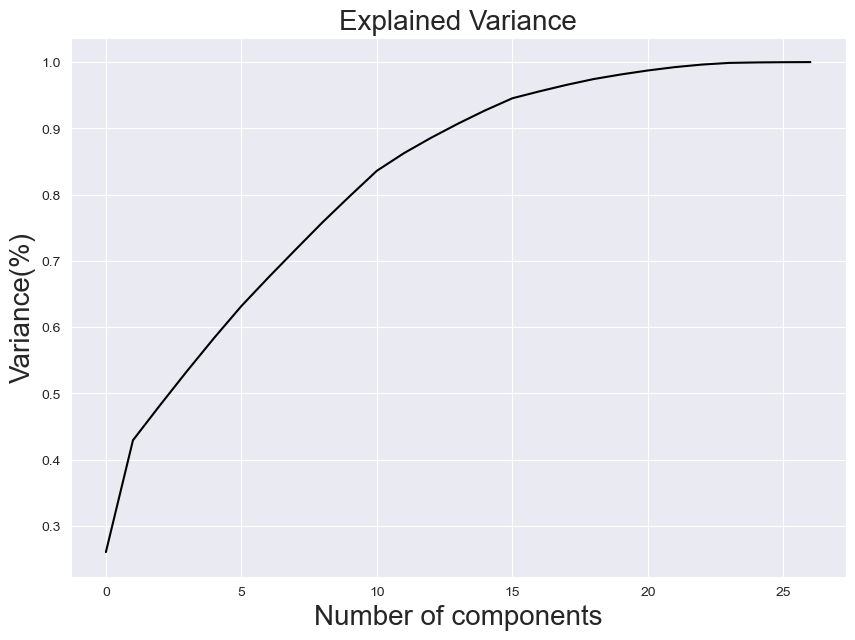

In [42]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(data)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

In [51]:
# Selecting the components
pca = PCA(n_components=13)
new_data = pca.fit_transform(data)
new_data

array([[-1.76740246,  0.676441  , -1.16799274, ..., -0.46174293,
         1.10138164, -1.0801224 ],
       [-0.21682013,  1.64424874, -0.6625682 , ..., -1.04892911,
         0.12771248, -0.2354437 ],
       [ 2.46130617,  3.40820552, -1.6791596 , ..., -1.90437934,
         0.1724461 , -1.75740804],
       ...,
       [-1.63183781,  2.46097217, -1.39512631, ...,  2.45464818,
        -0.73440375, -0.45468952],
       [-1.70025553,  1.72159122, -1.59132069, ..., -0.09810805,
        -0.2274383 ,  0.4771668 ],
       [ 5.75201828, -2.38121146, -0.21018452, ...,  0.43854641,
        -0.03205256,  0.59397689]])

In [52]:
# CREATE NEW DATAFRAME
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=data.PerformanceRating

principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,PerformanceRating
0,-1.767402,0.676441,-1.167993,-0.851935,0.205579,-1.460274,1.014249,-0.664216,0.710983,0.225247,-0.461743,1.101382,-1.080122,3
1,-0.216820,1.644249,-0.662568,0.931494,1.845667,-0.016368,1.505612,-0.782890,-0.189284,1.357759,-1.048929,0.127712,-0.235444,3
2,2.461306,3.408206,-1.679160,0.166316,0.245072,1.427942,1.291152,0.899282,-1.272198,-0.353911,-1.904379,0.172446,-1.757408,4
3,0.807016,3.802775,1.248267,-1.221907,-0.366836,-0.068040,-0.224407,-0.344578,0.518090,0.088507,-0.161038,0.846755,1.466246,3
4,5.802571,-0.575917,1.885541,2.000293,0.009020,0.057411,1.545573,-0.195816,0.889081,0.411710,-0.768734,-0.733301,0.964284,3


In [53]:
# SAVE PRE-PROCESS DATA
principle_df.to_csv('employee_efficiency_analysis_preprocessed_data.csv')

# Reading new preprocess csv file
df = pd.read_csv('employee_efficiency_analysis_preprocessed_data.csv')

# Get first five rows 
df.head()

,Unnamed: 0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,PerformanceRating
0,0,-1.767402,0.676441,-1.167993,-0.851935,0.205579,-1.460274,1.014249,-0.664216,0.710983,0.225247,-0.461743,1.101382,-1.080122,3
1,1,-0.216820,1.644249,-0.662568,0.931494,1.845667,-0.016368,1.505612,-0.782890,-0.189284,1.357759,-1.048929,0.127712,-0.235444,3
2,2,2.461306,3.408206,-1.679160,0.166316,0.245072,1.427942,1.291152,0.899282,-1.272198,-0.353911,-1.904379,0.172446,-1.757408,4
3,3,0.807016,3.802775,1.248267,-1.221907,-0.366836,-0.068040,-0.224407,-0.344578,0.518090,0.088507,-0.161038,0.846755,1.466246,3
4,4,5.802571,-0.575917,1.885541,2.000293,0.009020,0.057411,1.545573,-0.195816,0.889081,0.411710,-0.768734,-0.733301,0.964284,3
